# Detecting Fake News with Python and Machine Learning

## By practicing on this project i can get aware of the terms related to fake news 

In [29]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [30]:
# Importing Libraries

# I will make a first contact with tfidfvectorizer and PassiveAggressive classifier

import numpy as np
import pandas as pd 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## TfidfVectorizer

## TF (Term Frequency) -> Number of times a word apperas in the txt. A document is a good match when the term is part of the search terms
## IDF(Inverse Docuemnt Frequency) -> Words that have many occurencies in a document. How significant a term is in the text

### The TfidfVectorizers converts raw documents intro a mtrix of TF-IDF

## PassiveAggressiveClassifier

## Online learning algorithms. remains passive for a correct classification outcome and can be aggressive in a miscalculation, updating and adjusting.

## Not like others algorithms, it does not converge -> It pudates that correct the loss and make a small change in the norm of the weight vector

In [42]:
# Reading the csv data

df = pd.read_csv('news.csv')

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [44]:
# How many lines this document has

print(df.shape)

# Getting the veredict and text from every news

text = df.text
label = df.label

(6335, 4)


In [17]:
# Splitting the dataset into training and testing set 

x_train,x_test,y_train,y_test = train_test_split(text,label,test_size=0.2,random_state = 7)
# text is the independent variable. It has the content that i want to use to train my model (it has the articles that are going to be analyzed)

# label is the dependent variable that shows if the article is fake or real. Thus, it is what my model will learn to predict

# test_size is the proportion of test set. In this case it will be 20% test,80% train. A smaller test size means more data is avaiable for training

# random_state ensures that the train-test split produces the SAME results everytime (it is a seed). Hence, the data split will always be the same

# OBS: text and label must have the same number of samples nad the column names should be the same without NaN (already cleaned)

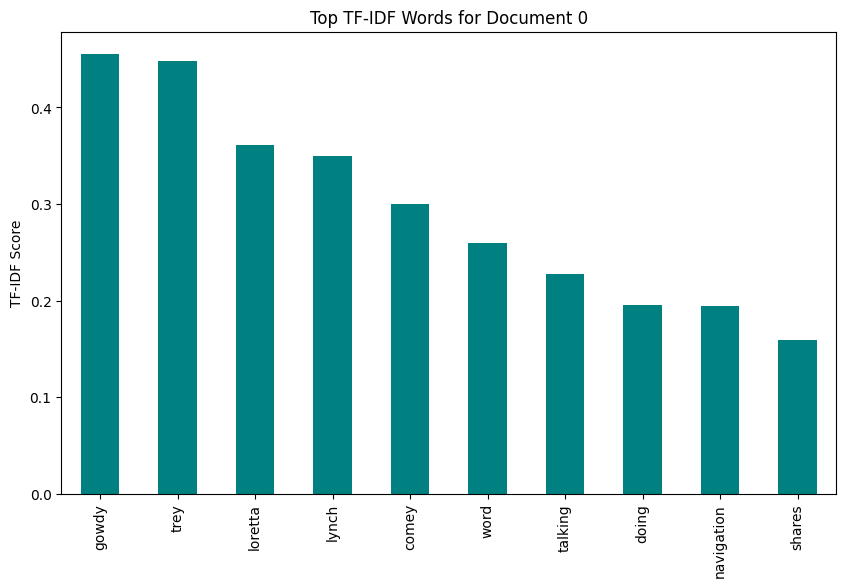

In [38]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# stop_words = english removes all commom words in english such as The, is , in etc that do not carry and meaning for classification
# This ensures to reduce noise of the dataset and improve performance

# max_df = 0.7 ignores words that appear in more than 70% of the documents (frequent words). These words may not provide useful info for distinguish between fake and real
# This can improve accuracy

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
# fit learns the vocabulary and weights of words in the training data
# it is a sparse matrix where Each row is a new article and each column a unique word from the text.
# The values in the matrix represent the TF-IDF score for each word

# Convert sparse matrix to dense array
tfidf_dense = tfidf_train.todense()
# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create DataFrame from dense matrix
df_tfidf = pd.DataFrame(tfidf_dense, columns=feature_names)

doc_index = 0  # Choose a document index
tfidf_scores = df_tfidf.iloc[doc_index]

# Sort words by importance and select top 10
top_tfidf_words = tfidf_scores.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_tfidf_words.plot(kind='bar', color='teal')
plt.title(f"Top TF-IDF Words for Document {doc_index}")
plt.ylabel("TF-IDF Score")
plt.show()

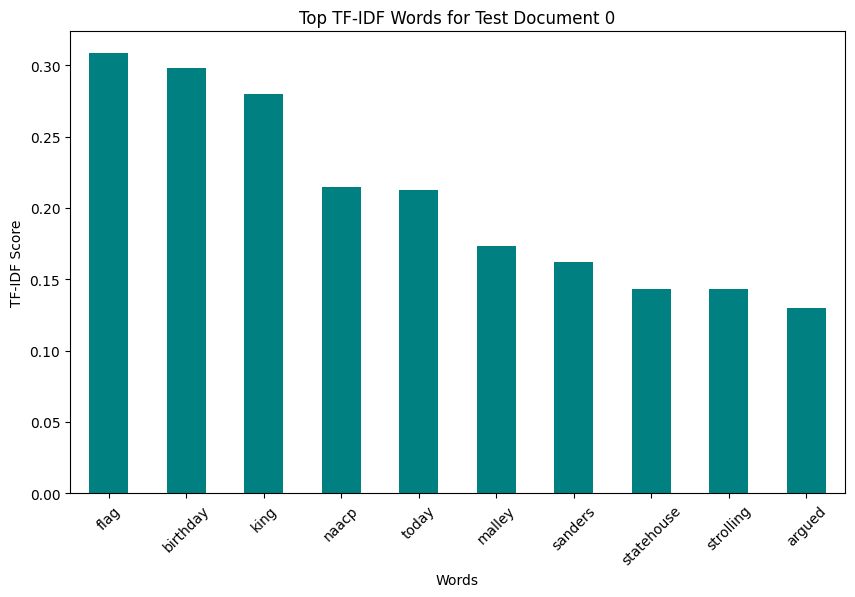

In [47]:
# Now for the test set
tfidf_test=tfidf_vectorizer.transform(x_test)


# Convert the sparse matrix to a dense format for visualization
tfidf_test_dense = tfidf_test.todense()

# Get feature names (words) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame with words as columns
df_tfidf_test = pd.DataFrame(tfidf_test_dense, columns=feature_names)

# Select document index from the test set
doc_index = 0  # Choose any document from the test set

# Get TF-IDF scores for the document
tfidf_scores = df_tfidf_test.iloc[doc_index]

# Sort the words by importance and select top 10
top_tfidf_words = tfidf_scores.sort_values(ascending=False).head(10)

# Plot top words for the test document
plt.figure(figsize=(10, 6))
top_tfidf_words.plot(kind='bar', color='teal')
plt.title(f"Top TF-IDF Words for Test Document {doc_index}")
plt.ylabel("TF-IDF Score")
plt.xlabel("Words")
plt.xticks(rotation=45)
plt.show()

In [48]:
# PassiveAggressiveClassifier 
# How to fi tfidf_train and y_train

# I will predict how test set from the tfidfvectorizerr and calculate the accuracy of it 

#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.29%


In [49]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

# [True Positive False Negative]
# [False Positive True Negative]

array([[1182,   88],
       [  82, 1182]])